In [1]:
from graph_tool.all import *
import graph_tool.all as gt
import numpy as np
import random
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import scipy as sp
import pandas as pd
from tqdm import tqdm
from decimal import Decimal

Node = 1000
m = 2
times = 100
M_list = [4, 8, 10, 20]
beta_list = [1, 0.5, 0, -1, -3, -5, -10, -100]
w_list = [Decimal("0.00"), Decimal("0.50"), Decimal("0.70"), Decimal("0.90"), Decimal("0.95"), Decimal("0.98")]

In [ ]:
def no_normalized_laplacian(g):
    L = gt.laplacian(g)
    L_sparse = sp.sparse.csr_matrix(L)
    eigenvalues, eigenvectors = sp.sparse.linalg.eigsh(L_sparse, k=2, which='SM')
    second_values = eigenvalues[1]
    return second_values

for M in M_list:
    for beta in beta_list:
        records = []
        for W in w_list:
            for i in tqdm(range(times), desc=f"Mo={M} beta={beta} w={W}"):
                g = gt.load_graph(
                    f"~/o_t_hayashilab/network_data/graph-tool/modular_network/N={Node}/m={m}/beta={beta}/w={W}/Mo={M}/{i}.gt.gz"
                )
                l = gt.label_largest_component(g)
                u = gt.GraphView(g, vfilt=l)
                fiedler = no_normalized_laplacian(u)
                state = gt.BlockState(g, b=g.vp.module_number)
                Q = gt.modularity(g, state.get_blocks())
                records.append({"modularity": Q, "fiedler": fiedler, "w": float(W), "beta": beta})
        df = pd.DataFrame(records)
        df.to_csv(f"~/o_t_hayashilab/network_code/result/mo{M}_beta{beta}_modularity_vs_fiedler.csv", index=False)

Mo=20 beta=-100 w=0.98: 100%|██████████| 100/100 [00:13<00:00,  7.18it/s]


/tmp/ipykernel_113294/3923698107.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("viridis")
/tmp/ipykernel_113294/3923698107.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("viridis")
/tmp/ipykernel_113294/3923698107.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("viridis")


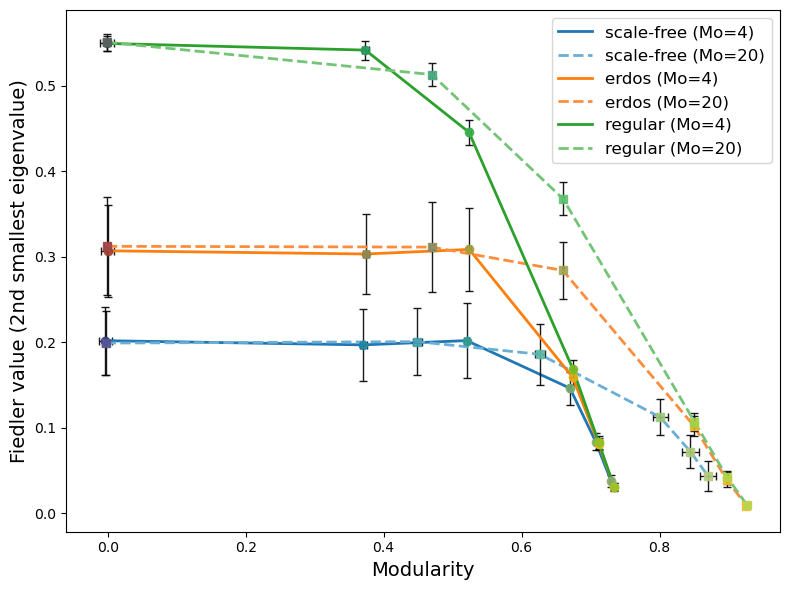

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib

net_list = ["scale-free", "erdos", "regular"]
colors_mo4 = {"scale-free": "tab:blue", "erdos": "tab:orange", "regular": "tab:green"}
colors_mo20 = {"scale-free": "#6baed6", "erdos": "#fd8d3c", "regular": "#74c476"}
w_list = [0.00, 0.50, 0.70, 0.90, 0.95, 0.98]

plt.figure(figsize=(8, 6))

for net in net_list:
    # mo=4
    df4 = pd.read_csv(f"{net}_mo4_modularity_vs_fiedler.csv")
    means4 = df4.groupby("w").agg({"modularity": "mean", "fiedler": "mean"})
    stds4 = df4.groupby("w").agg({"modularity": "std", "fiedler": "std"})
    cmap = cm.get_cmap("viridis")
    norm = plt.Normalize(min(w_list), max(w_list))
    base_rgb4 = np.array(plt.get_cmap("tab10")(list(colors_mo4.keys()).index(net))[:3])
    for w in w_list:
        sub = df4[df4["w"] == w]
        mean_mod = sub["modularity"].mean()
        mean_fied = sub["fiedler"].mean()
        std_mod = sub["modularity"].std()
        std_fied = sub["fiedler"].std()
        grad_rgb = np.array(cmap(norm(w))[:3])
        blend_rgb = base_rgb4 * 0.5 + grad_rgb * 0.5
        plt.errorbar(mean_mod, mean_fied, xerr=std_mod, yerr=std_fied,
                     fmt='o', color=blend_rgb, ecolor="black", elinewidth=1, capsize=3, label=None, alpha=0.9)
    plt.plot(means4["modularity"], means4["fiedler"], '-', color=colors_mo4[net], label=f"{net} (Mo=4)", linewidth=2)

    # mo=20
    df20 = pd.read_csv(f"{net}_mo20_modularity_vs_fiedler.csv")
    means20 = df20.groupby("w").agg({"modularity": "mean", "fiedler": "mean"})
    stds20 = df20.groupby("w").agg({"modularity": "std", "fiedler": "std"})
    base_rgb20 = np.array(matplotlib.colors.to_rgb(colors_mo20[net]))
    for w in w_list:
        sub = df20[df20["w"] == w]
        mean_mod = sub["modularity"].mean()
        mean_fied = sub["fiedler"].mean()
        std_mod = sub["modularity"].std()
        std_fied = sub["fiedler"].std()
        grad_rgb = np.array(cmap(norm(w))[:3])
        blend_rgb = base_rgb20 * 0.5 + grad_rgb * 0.5
        plt.errorbar(mean_mod, mean_fied, xerr=std_mod, yerr=std_fied,
                     fmt='s', color=blend_rgb, ecolor="black", elinewidth=1, capsize=3, label=None, alpha=0.9)
    plt.plot(means20["modularity"], means20["fiedler"], '--', color=colors_mo20[net], label=f"{net} (Mo=20)", linewidth=2)

plt.xlabel("Modularity", fontsize=14)
plt.ylabel("Fiedler value (2nd smallest eigenvalue)", fontsize=14)
plt.legend(fontsize=12, loc="upper right")
plt.tight_layout()
plt.show()

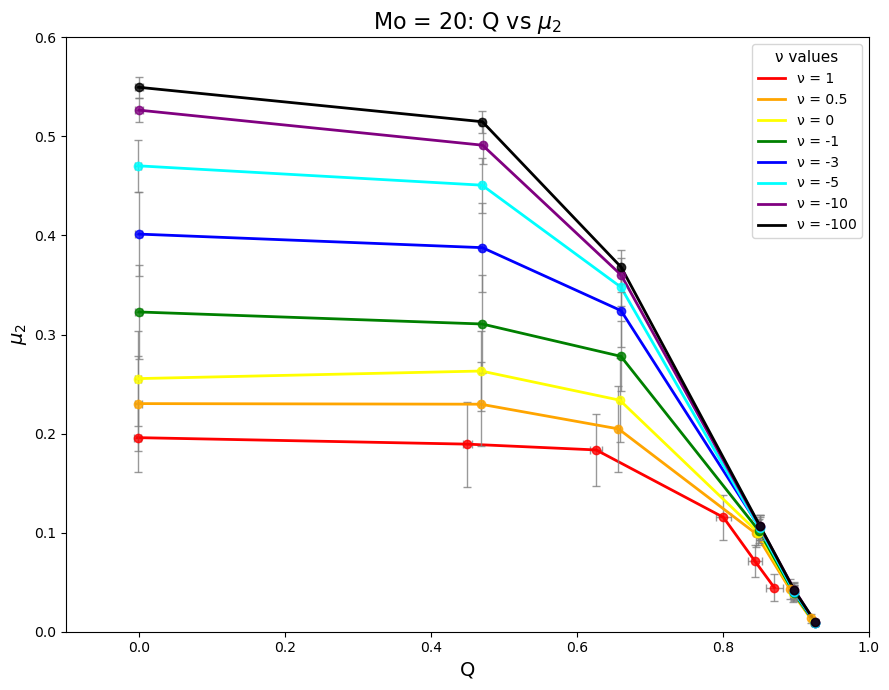

In [9]:
color_list = [
    "red",       # β = 1
    "orange",    # β = 0.5
    "yellow",    # β = 0
    "green",     # β = -1
    "blue",      # β = -3
    "cyan",      # β = -5
    "purple",    # β = -10
    "black",     # β = -100
]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# betaのリストと色の固定対応
beta_list = [1, 0.5, 0, -1, -3, -5, -10, -100]
color_list = ["red", "orange", "yellow", "green", "blue", "cyan", "purple", "black"]
color_map = dict(zip(beta_list, color_list))

w_list = [0.00, 0.50, 0.70, 0.90, 0.95, 0.98]
Mo = 20

plt.figure(figsize=(9, 7))

for beta in beta_list:
    df = pd.read_csv(f"~/o_t_hayashilab/network_code/result/mo{Mo}_beta{beta}_modularity_vs_fiedler.csv")
    df = df[df["w"].isin(w_list)]

    # 平均・標準偏差の取得
    means = df.groupby("w").agg({"modularity": "mean", "fiedler": "mean"})
    stds = df.groupby("w").agg({"modularity": "std", "fiedler": "std"})

    for w in w_list:
        sub = df[df["w"] == w]
        mean_mod = sub["modularity"].mean()
        mean_fied = sub["fiedler"].mean()
        std_mod = sub["modularity"].std()
        std_fied = sub["fiedler"].std()
        plt.errorbar(mean_mod, mean_fied, xerr=std_mod, yerr=std_fied,
                     fmt='o', color=color_map[beta], ecolor="gray", elinewidth=1, capsize=3, alpha=0.8)

    # トレンド線
    plt.plot(means["modularity"], means["fiedler"], '-', linewidth=2,
             color=color_map[beta], label=f"ν = {beta}")

# 軸・タイトル・凡例など
plt.xlabel("Q", fontsize=14)
plt.ylabel("$\mu_2$", fontsize=14)
plt.title(f"Mo = {Mo}: Q vs $\mu_2$", fontsize=16)
plt.xlim(-0.1, 1.0)
plt.ylim(0, 0.60)
plt.legend(title="ν values", fontsize=10, title_fontsize=11, loc="upper right")
plt.grid(False)
plt.tight_layout()
plt.show()


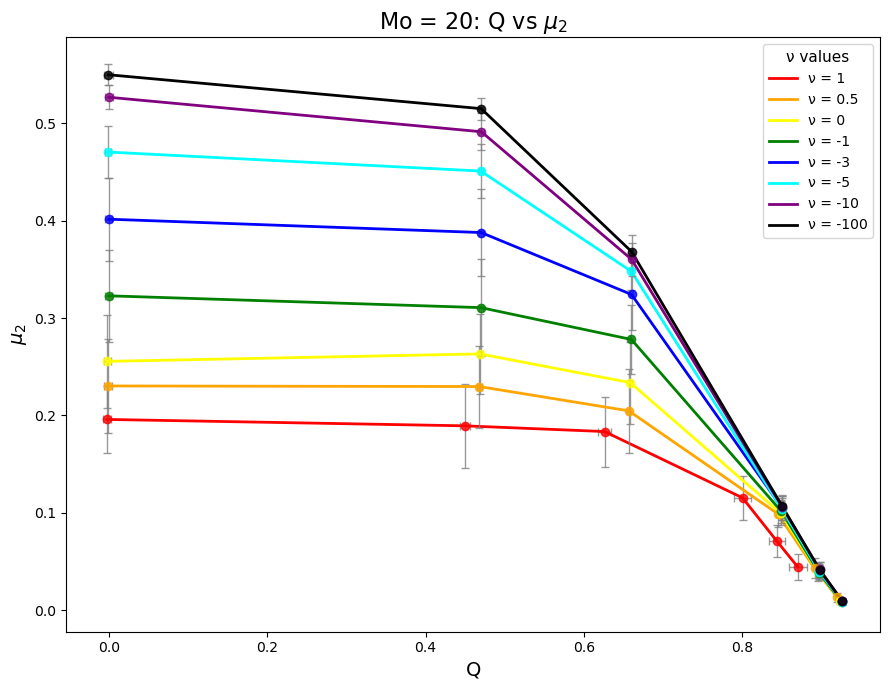

In [ ]:
color_list = [
    "red",       # β = 1
    "orange",    # β = 0.5
    "yellow",    # β = 0
    "green",     # β = -1
    "blue",      # β = -3
    "cyan",      # β = -5
    "purple",    # β = -10
    "black",     # β = -100
]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# betaのリストと色の固定対応
beta_list = [1, 0.5, 0, -1, -3, -5, -10, -100]
color_list = ["red", "orange", "yellow", "green", "blue", "cyan", "purple", "black"]
color_map = dict(zip(beta_list, color_list))

w_list = [0.00, 0.50, 0.70, 0.90, 0.95, 0.98]
Mo = 4

plt.figure(figsize=(9, 7))

for beta in beta_list:
    df = pd.read_csv(f"~/o_t_hayashilab/network_code/result/mo{Mo}_beta{beta}_modularity_vs_fiedler.csv")
    df = df[df["w"].isin(w_list)]

    # 平均・標準偏差の取得
    means = df.groupby("w").agg({"modularity": "mean", "fiedler": "mean"})
    stds = df.groupby("w").agg({"modularity": "std", "fiedler": "std"})

    for w in w_list:
        sub = df[df["w"] == w]
        mean_mod = sub["modularity"].mean()
        mean_fied = sub["fiedler"].mean()
        std_mod = sub["modularity"].std()
        std_fied = sub["fiedler"].std()
        plt.errorbar(mean_mod, mean_fied, xerr=std_mod, yerr=std_fied,
                     fmt='o', color=color_map[beta], ecolor="gray", elinewidth=1, capsize=3, alpha=0.8)

    # トレンド線
    plt.plot(means["modularity"], means["fiedler"], '-', linewidth=2,
             color=color_map[beta], label=f"ν = {beta}")

# 軸・タイトル・凡例など
plt.xlabel("Q", fontsize=14)
plt.ylabel("$\mu_2$", fontsize=14)
plt.title(f"Mo = {Mo}: Q vs $\mu_2$", fontsize=16)
plt.legend(title="ν values", fontsize=10, title_fontsize=11, loc="upper right")
plt.grid(False)
plt.tight_layout()
plt.show()